In [1]:
import pandas as pd

In [2]:
#To import data into Python environment
df = pd.read_csv('Comcast_telecom_complaints_data.csv')

In [87]:
df.head(2)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_col,month,day,status_check
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,customer care call,Abingdon,Maryland,21009,Closed,No,2015-04-22,4,22,closed
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,internet,Acworth,Georgia,30102,Closed,No,2015-08-04,8,4,closed


In [24]:
#the trend chart for the number of complaints at monthly and daily granularity levels
df['date_col'] = pd.to_datetime(df['Date_month_year'])
df['month'] = df['date_col'].dt.month
df['day'] = df['date_col'].dt.day

In [88]:
df.head(1)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_col,month,day,status_check
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,customer care call,Abingdon,Maryland,21009,Closed,No,2015-04-22,4,22,closed


In [7]:
#to check the duplicates in the table
df[['Ticket #']].duplicated().sum()

0

In [8]:
df[['Ticket #']]

,Ticket #
0,250635
1,223441
2,242732
3,277946
4,307175
...,...
2219,213550
2220,318775
2221,331188
2222,360489


In [29]:
df[['month','day','Ticket #']].groupby('month').count().reset_index()

,month,day,Ticket #
0,1,55,55
1,2,59,59
2,3,45,45
3,4,375,375
4,5,317,317
5,6,1046,1046
6,7,49,49
7,8,67,67
8,9,55,55
9,10,53,53


<AxesSubplot:xlabel='month'>

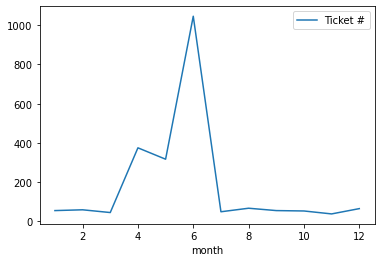

In [26]:
#the trend chart for the number of complaints at monthly levels 
df[['month','Ticket #']].groupby('month').count().plot()

<AxesSubplot:xlabel='day'>

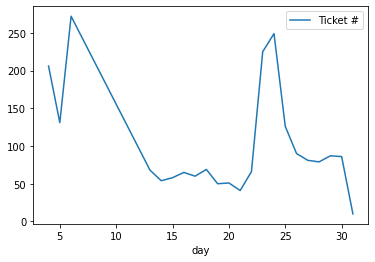

In [28]:
#the trend chart for the number of complaints on daily levels
df[['day','Ticket #']].groupby('day').count().plot()

In [30]:
# table with the frequency of complaint types
df['Customer Complaint'].str.lower().value_counts()

comcast                                                            102
comcast data cap                                                    30
comcast internet                                                    29
comcast data caps                                                   21
comcast billing                                                     18
                                                                  ... 
monthly data caps                                                    1
comcast/xfinity poor service, fraudulent billing and collection      1
lost emails/billing                                                  1
improper billing and non resolution of issues                        1
comcast, ypsilanti mi internet speed                                 1
Name: Customer Complaint, Length: 1740, dtype: int64

In [ ]:
# Comcast complaints are maximum

In [34]:
# To categorize Open & Pending as Open and Closed & Solved as Closed.
def check(y):
    if y in ['Open','Pending']:
        return 'open'
    else:
        return 'closed'

df['status_check'] = df['Status'].apply(check)

In [36]:
df.head(5)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_col,month,day,status_check
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22,4,22,closed
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04,8,4,closed
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18,4,18,closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05,7,5,open
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26,5,26,closed


In [43]:
df[['State','status_check','Ticket #']].groupby(['State','status_check']).count()

Ticket #
State         status_check          
Alabama       closed              17
              open                 9
Arizona       closed              14
              open                 6
Arkansas      closed               6
...                              ...
Virginia      open                11
Washington    closed              75
              open                23
West Virginia closed               8
              open                 3

[77 rows x 1 columns]

In [47]:
df1 = df[['State','status_check','Ticket #']].groupby(['State','status_check']).count().unstack().fillna(0)

In [48]:
df1.columns = [b for a, b in df1.columns]

In [49]:
df1.columns

Index(['closed', 'open'], dtype='object')

In [50]:
df1

,closed,open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


<AxesSubplot:xlabel='State'>

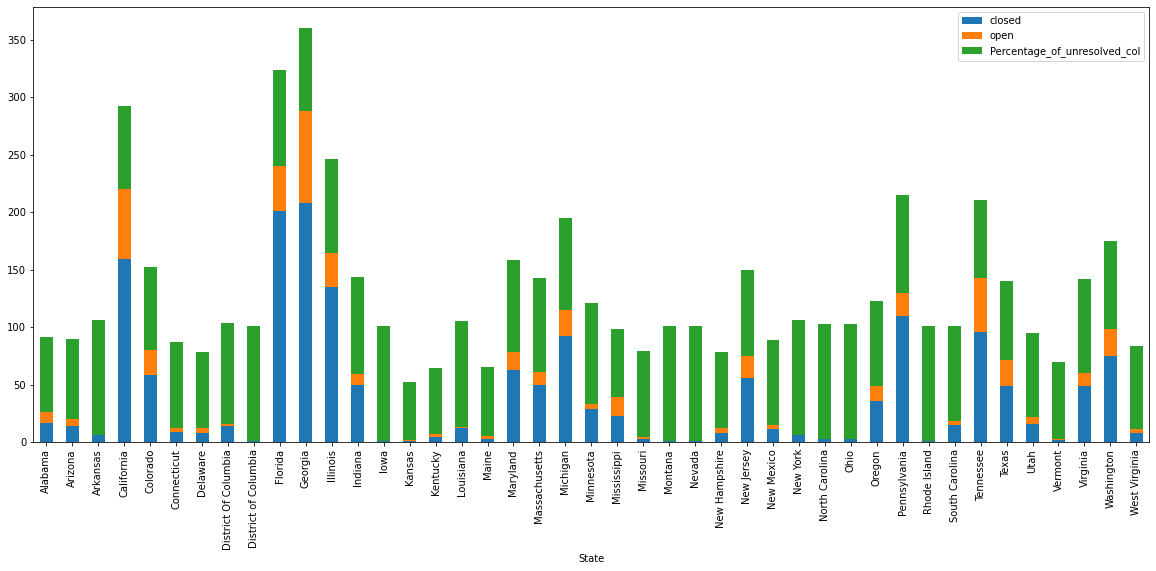

In [91]:
# State wise status of complaints in a stacked bar chart
df1.plot(kind = 'bar',stacked = True,figsize=(20,8))

In [69]:
df1['Percentage_of_unresolved_col']=(df1['closed'] / df1.sum(axis=1))*100

In [70]:
df1

,closed,open,Percentage_of_unresolved_col
State,,,
Alabama,17.0,9.0,65.384615
Arizona,14.0,6.0,70.000000
Arkansas,6.0,0.0,100.000000
California,159.0,61.0,72.272727
Colorado,58.0,22.0,72.500000
Connecticut,9.0,3.0,75.000000
Delaware,8.0,4.0,66.666667
District Of Columbia,14.0,2.0,87.500000
District of Columbia,1.0,0.0,100.000000


In [78]:
df1['Percentage_of_unresolved_col'].max()

100.0

In [ ]:
# The states Arkansas,District of Columbia,Iowa,Rhode Island,Montana,Nevada,North Carolina,Ohio have most number of unresolved complaints

In [82]:
#the percentage of complaints resolved till date, which were received through the Internet and customer care calls
df['Received Via'] = df['Received Via'].str.lower()

In [83]:
df['Received Via'].unique()

array(['customer care call', 'internet'], dtype=object)

In [89]:
(df[df['status_check']=='open'].shape[0]/len(df))*100

23.246402877697843